<center><h1 style="font-size:40px;">Exercise I:<br> Backpropagation
</h1></center>

---

# Introduction

Welcome to the second part of the first lab for Deep Learning!

In this lab we will scratch the surface of pytorch and deep learning. Pytorch is a power tool for data scientists to train neural networks. Pytorch have a lot of features which can be used too train and create custom dataloaders, models and trainers in order to solve most problems related to neural networks.

For this lab all tasks include **TODO's** these are expected to be done before the deadline. The labs also include **Question** which should be answered and included in the *Report.ipynb*. Some sections does not contain any **TODO's** but is good to understand them. 

There is a file called config.py. This file contains most of the settings that is used during the lab. We wont use every setting at all time but the config help us to keep organised.

---

# Lab 1

The following code allows us to edit imported files without restarting the kernel for the notebook

In [1]:
%load_ext autoreload
%autoreload 2
# Hacky solution to access the global utils package
import sys,os
sys.path.append(os.path.dirname(os.path.realpath('')))

In [2]:
# local modules
from config import LabConfig
from sklearn.datasets import load_digits
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# Torch packages
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

## Load config

In [3]:
cfg = LabConfig()

## Define neural network

In order to create a neural network model we need to implement the following class which inherits nn.Module. 

The first example is a single perceptron.

If we assume that the trainer uses CrossEntropyLoss from pytorch we do not need to define an activation function before the output since CrossEntropyLoss combines nn.LogSoftmax() and nn.NLLLoss() according to the pytorch documentation.

The input_size for this lab is the image size (cfg.IMAGE_WIDTH*cfg.IMAGE_HEIGHT) and the output size are the number of classes to predict.

In [4]:
# Example 1
class Perceptron(nn.Module):
    def __init__(self,  input_size, output_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size,output_size)
        
    def forward(self, x):
        x = x.view(x.size(0), -1) # Flatten
        output = self.fc(x)
        return output

An architecture with 1 or more hidden layers are known as a deep/multilayer feedforward model or multilayer perceptron model (MLP). 

## Task 1

**TODO:** Implement the MLP architecture to have 1 or more hidden layers.

In [27]:
class MLP(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, hidden_layers=1):
        super(MLP, self).__init__()
        # Simple MLP with one hidden layer
        modules = []
        
        
        modules.append(nn.Linear(input_size, hidden_size)) # Add input
    
        for hidden in range(hidden_layers):
            modules.append(nn.ReLU())
            modules.append(nn.Linear(hidden_size, output_size)) if hidden == hidden_layers - 1 else modules.append(nn.Linear(hidden_size, hidden_size))
        
        
        self.model = nn.Sequential(*modules)
        #print(self.model)
 
    def forward(self, x):
        x = x.view(x.size(0), -1) # Look this up
        output = self.model(x)
        return output

## Load dataset
For us to load the data we will use *torchvision* transforms which allow us to pipeline the preprocessing and augmentation steps. Furthermore torchvision allow us to import the MNIST dataset and create dataloaders for batching, shuffle and multithreading.

In [18]:
class ToTensor(torchvision.transforms.ToTensor):

    def __call__(self, pic):
        return super().__call__(np.array(pic, copy=True))

transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5, ), (0.5, ))])

trainset = torchvision.datasets.MNIST(root='../data', 
                                        train=True,
                                        download=True,
                                        transform=transform)

testset = torchvision.datasets.MNIST(root='../data', 
                                        train=False, 
                                        download=True, 
                                        transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=2)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=100,
                                         shuffle=False,
                                         num_workers=2)

## Plot a batch from dataset

In order to visualise the dataset we will use the function plot_grid_of_batch in order to plot the data of a batch. 

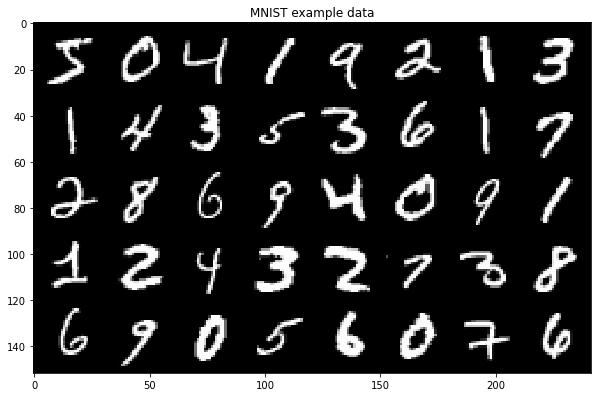

In [19]:
sample_index = 40
plt.figure(figsize=(10,10))
plt.imshow(torchvision.utils.make_grid(trainset.data[:sample_index].unsqueeze(1).float(), normalize=True).permute(1,2,0),cmap=plt.cm.gray_r,interpolation='nearest')
plt.title("MNIST example data");

## Learning framework

In this section we will learn to predict with the help of our network. The approach consist of two parts; a training and a validation step.

Training consist of 4 stages:
1. Compute model's predictions (forward pass)
2. Compute the loss, using predictions, labels and a appropriate loss function
3. Compute the gradients for every parameter (backpropagation) 
4. Update the parameters

Validation consist of 2 stages:
1. Compute model's predictions (forward pass)
2. Compute the loss, using predictions, labels and a appropriate loss function

## Task 2

**TODO:** Implement the steps to run the trainer below

## Trainer

In [28]:
def trainer(model, epochs):
    loss_metric = []
    for epoch in range(epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader, 0):
            # TODO: zero parameter gradients
            optimizer.zero_grad() # Set the gradients to zero before backprop
            # TODO: Feed forward
            outputs = model.forward(inputs)
            
            # TODO: Calculate loss
            loss = criterion(outputs, labels) # Calculate the loss
            
            # TODO: Backpropagate
            loss.backward() # Backpropagate the error
     
            # TODO: Optimizer step
            optimizer.step() # Update the new gradients
        
            # print statistics
            running_loss += loss.item()
            
            print(f'[{epoch + 1}, {i+1:4}/{len(trainloader)}] loss: {loss.item():.4}', end='\r')
        loss_metric.append(loss.item()/len(trainloader))
    return {'loss':loss_metric}

## Configs
For this lab we dont have a lot of configs and we keep it simple. We can define our model, number of hidden nodes, optimizer and number of epochs to run.

## Task 3 
**TODO:** Implement;
1. Criterion (loss)
2. Optimizer

## Task 4
**TODO:** 
1. Train the network with the Perceptron model.
2. Train the MLP model and see if it performs better than the Perceptron.
3. Extend Feedforward with additional hidden nodes until we see that the loss is going down.
4. In this task increase the depht (more layers) of the Feedforward network instead of the size of the hidden layer.
5. Test different hyperparameters with the MLP model. How did the result change? Is the result better or worse, why? 


**Questions:** 
1. How did the Feedforward network perform? 
2. How did the modified Feedforward network perform? 
3. Can we reduce number of nodes with an increased number of layers or vise verse, any changes?


In [21]:
HIDDEN_NODES = 2
Percmodel = Perceptron(cfg.IMAGE_WIDTH*cfg.IMAGE_HEIGHT, cfg.NUM_CLASS)# TODO

criterion = nn.CrossEntropyLoss() # TODO
optimizer = torch.optim.Adam(Percmodel.parameters()) #TODO
epochs = 5

#### Task 4.1

In [22]:
# Run the model
Percmetrics = trainer(Percmodel, epochs)

#### Task 4.2

In [23]:
MLPmodel = MLP(cfg.IMAGE_WIDTH*cfg.IMAGE_HEIGHT, cfg.NUM_CLASS, HIDDEN_NODES)
optimizer = torch.optim.Adam(MLPmodel.parameters())

Sequential(
  (0): Linear(in_features=784, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=10, bias=True)
)


In [24]:
MLPmetrics = trainer(MLPmodel, epochs)

Lets check the loss over each epoch.

Text(0.5, 1.0, 'Training loss')

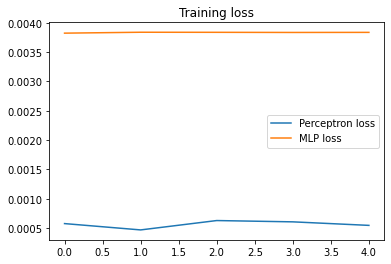

In [25]:
plt.plot(Percmetrics['loss'], label='Perceptron loss')
plt.plot(MLPmetrics['loss'], label='MLP loss')
plt.legend()
plt.title("Training loss")

#### Task 4.3

In [32]:
for hidden_nodes in [2, 10, 20, 50, 100, 150, 200, 250]:
    print("Hidden nodes:", hidden_nodes, end='\n')
    MLPmodel = MLP(cfg.IMAGE_WIDTH*cfg.IMAGE_HEIGHT, cfg.NUM_CLASS, hidden_nodes)
    optimizer = torch.optim.Adam(MLPmodel.parameters())
    MLPmetrics = trainer(MLPmodel, epochs)
    print()

Hidden nodes: 2
[5,  600/600] loss: 1.776
Hidden nodes: 10
[5,  600/600] loss: 0.3247
Hidden nodes: 20
[5,  600/600] loss: 0.28813
Hidden nodes: 50
[5,  600/600] loss: 0.25731
Hidden nodes: 100
[5,  600/600] loss: 0.11287
Hidden nodes: 150
[5,  600/600] loss: 0.02494
Hidden nodes: 200
[5,  600/600] loss: 0.07729
Hidden nodes: 250
[5,  600/600] loss: 0.10946


#### Task 4.4

In [33]:
MLPmodel = MLP(cfg.IMAGE_WIDTH*cfg.IMAGE_HEIGHT, cfg.NUM_CLASS, 150, 10)
optimizer = torch.optim.Adam(MLPmodel.parameters())
MLPmetrics = trainer(MLPmodel, epochs)

In [89]:
MLPmetrics

{'loss': [0.0007153716186682383,
  0.00028363235294818877,
  0.00020042508840560912,
  0.00043971473972002667,
  0.00013170680652062097]}

#### Task 4.5

##### Hyperparameter-tuning

In [60]:
dict_ = {} 
for hidden_layers in [2, 5, 10, 30, 50]:
    print("Hidden layers:", hidden_layers)
    for hidden_nodes in [2, 10, 50, 100]:
        print("  Hidden nodes:", hidden_nodes)
        MLPmodel = MLP(cfg.IMAGE_WIDTH*cfg.IMAGE_HEIGHT, cfg.NUM_CLASS, hidden_nodes, hidden_layers)
        optimizer = torch.optim.Adam(MLPmodel.parameters())
        MLPmetrics = trainer(MLPmodel, epochs)
        key = (hidden_layers, hidden_nodes)
        value = MLPmetrics['loss']
        if key not in dict_:
            dict_[key] = value
        print()    
    print()    

Hidden layers: 2
  Hidden nodes: 2
[5,  600/600] loss: 1.689
  Hidden nodes: 10
[5,  600/600] loss: 0.3283
  Hidden nodes: 50
[5,  600/600] loss: 0.11425
  Hidden nodes: 100
[5,  600/600] loss: 0.08818

Hidden layers: 5
  Hidden nodes: 2
[5,  600/600] loss: 1.892
  Hidden nodes: 10
[5,  600/600] loss: 0.2931
  Hidden nodes: 50
[5,  600/600] loss: 0.05513
  Hidden nodes: 100
[5,  600/600] loss: 0.16659

Hidden layers: 10
  Hidden nodes: 2
[5,  600/600] loss: 2.311
  Hidden nodes: 10
[5,  600/600] loss: 0.5962
  Hidden nodes: 50
[5,  600/600] loss: 0.25849
  Hidden nodes: 100
[5,  600/600] loss: 0.16068

Hidden layers: 30
  Hidden nodes: 2
[5,  600/600] loss: 2.296
  Hidden nodes: 10
[5,  600/600] loss: 2.296
  Hidden nodes: 50
[5,  600/600] loss: 2.298
  Hidden nodes: 100
[5,  600/600] loss: 2.303

Hidden layers: 50
  Hidden nodes: 2
[5,  600/600] loss: 2.298
  Hidden nodes: 10
[5,  600/600] loss: 2.304
  Hidden nodes: 50
[5,  600/600] loss: 2.303
  Hidden nodes: 100
[5,  600/600] loss:

In [61]:
lowestmean = 10000
best_values = (None, None)
for key in dict_:
    mean_ = np.mean(dict_[key])
    if mean_ < lowestmean:
        lowestmean = mean_
        best_values = key    

In [62]:
print("lowestmean: {}, hidden_layers: {}, hidden_nodes: {} ".format(lowestmean, best_values[0], best_values[1]))

lowestmean: 0.0002588305647174517, hidden_layers: 2, hidden_nodes: 100 


In [54]:
hidden_layers, hidden_nodes = best_values

In [55]:
best_model = MLP(cfg.IMAGE_WIDTH*cfg.IMAGE_HEIGHT, cfg.NUM_CLASS, hidden_nodes, hidden_layers)
optimizer = torch.optim.Adam(best_model.parameters())
MLPmetrics = trainer(best_model, epochs)

##### Less hidden nodes, more hidden layers

In [65]:
for hidden_layers in [2, 3, 4, 5, 10, 15, 20]:
    print("Hidden layers", hidden_layers)
    MLPmodel = MLP(cfg.IMAGE_WIDTH*cfg.IMAGE_HEIGHT, cfg.NUM_CLASS, 5, hidden_layers)
    optimizer = torch.optim.Adam(MLPmodel.parameters())
    MLPmetrics = trainer(MLPmodel, epochs)
    print()

Hidden layers 2
[5,  600/600] loss: 0.6445
Hidden layers 3
[5,  600/600] loss: 1.3728
Hidden layers 4
[5,  600/600] loss: 1.1259
Hidden layers 5
[5,  600/600] loss: 0.8558
Hidden layers 10
[5,  600/600] loss: 1.2381
Hidden layers 15
[5,  600/600] loss: 1.718
Hidden layers 20
[5,  600/600] loss: 1.507


##### More hidden nodes, less hidden layers

In [67]:
for hidden_nodes in [2, 5, 10, 15, 20, 25, 30, 50, 100]:
    print("Hidden layers", hidden_nodes)
    MLPmodel = MLP(cfg.IMAGE_WIDTH*cfg.IMAGE_HEIGHT, cfg.NUM_CLASS, hidden_nodes, 4)
    optimizer = torch.optim.Adam(MLPmodel.parameters())
    MLPmetrics = trainer(MLPmodel, epochs)
    print()

Hidden layers 2
[5,  600/600] loss: 2.302
Hidden layers 5
[5,  600/600] loss: 0.9675
Hidden layers 10
[5,  600/600] loss: 0.2463
Hidden layers 15
[5,  600/600] loss: 0.5265
Hidden layers 20
[5,  600/600] loss: 0.23153
Hidden layers 25
[5,  600/600] loss: 0.1923
Hidden layers 30
[5,  600/600] loss: 0.10265
Hidden layers 50
[5,  600/600] loss: 0.11551
Hidden layers 100
[5,  600/600] loss: 0.17797


## Testing

Lets predict some data to see the performance of a few samples

In [56]:
model = best_model

In [57]:
dataiter = iter(testloader)
images, labels = dataiter.next()
outputs = model(images)
_, predicted = torch.max(outputs, 1)

,0,1,2,3,4,5,6,7,8,9
Ground Truth,7,2,1,0,4,1,4,9,5,9
Predicted label,7,2,1,0,4,1,4,9,8,9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


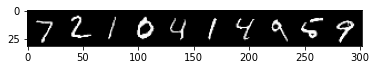

In [58]:
n_test = 10
df_result = pd.DataFrame({
    'Ground Truth': labels[:n_test],
    'Predicted label': predicted[:n_test]})
display(df_result.T)
plt.imshow(torchvision.utils.make_grid(images[:n_test, :, :, :], nrow=n_test).permute(1,2,0))